# Plotting ACF and PACF
Ref: https://towardsdatascience.com/significance-of-acf-and-pacf-plots-in-time-series-analysis-2fa11a5d10a8

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set(style="whitegrid", color_codes=True)

from statsmodels.tsa.stattools import acf, pacf

In [2]:
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/daily-total-female-births.csv"
data = pd.read_csv(url, header=0, index_col=0)
data.head()

,Births
Date,
1959-01-01,35
1959-01-02,32
1959-01-03,30
1959-01-04,31
1959-01-05,44


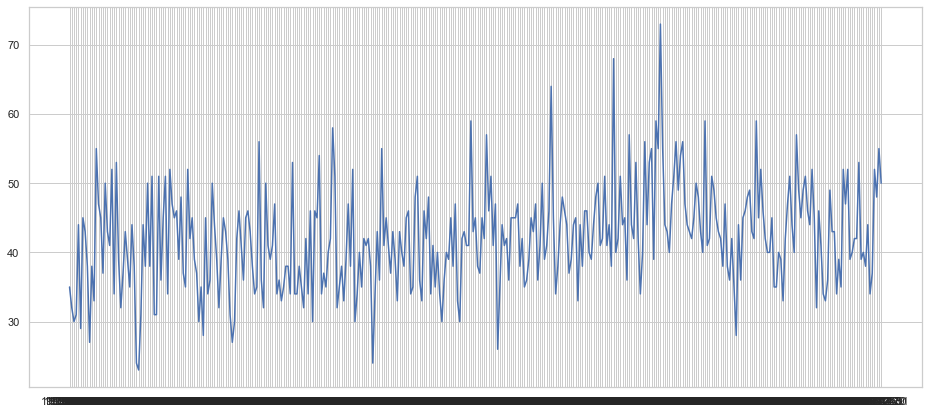

In [3]:
#exponential series to get the trend
# ye = np.exp(t**0.5)
#adding normally distributed series in exponential series
# y = ys+ye
#plot
plt.figure(figsize=(16,7))
plt.plot(data)
plt.show()

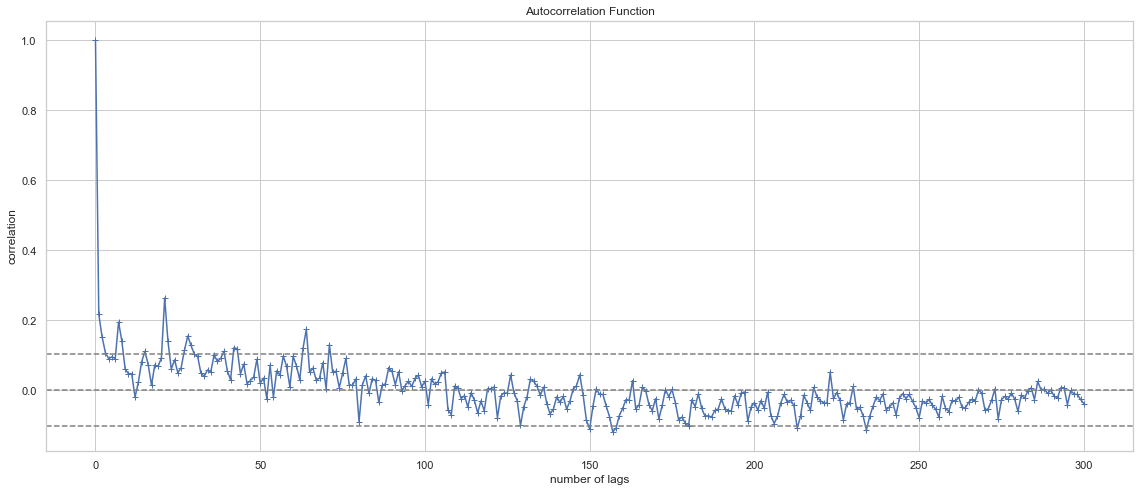

In [4]:
#calling auto correlation function
lag_acf = acf(data.values, nlags=300)
#Plot PACF:
plt.figure(figsize=(16, 7))
plt.plot(lag_acf,marker='+')
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(data.values)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(data.values)),linestyle='--',color='gray')
plt.title('Autocorrelation Function')
plt.xlabel('number of lags')
plt.ylabel('correlation')
plt.tight_layout()

The above dotted lines represent the confidence band, with the center dotted line representing the mean. The upper and lower dotted lines represent boundaries based on 95% confidence interval.

We have a good positive correlation up through maybe 10, where the ACF plot cuts through the upper confidence threshold. Using too many lags will create multicollinearity though, so we'll check the PACF plot to get only the most relevant lags.

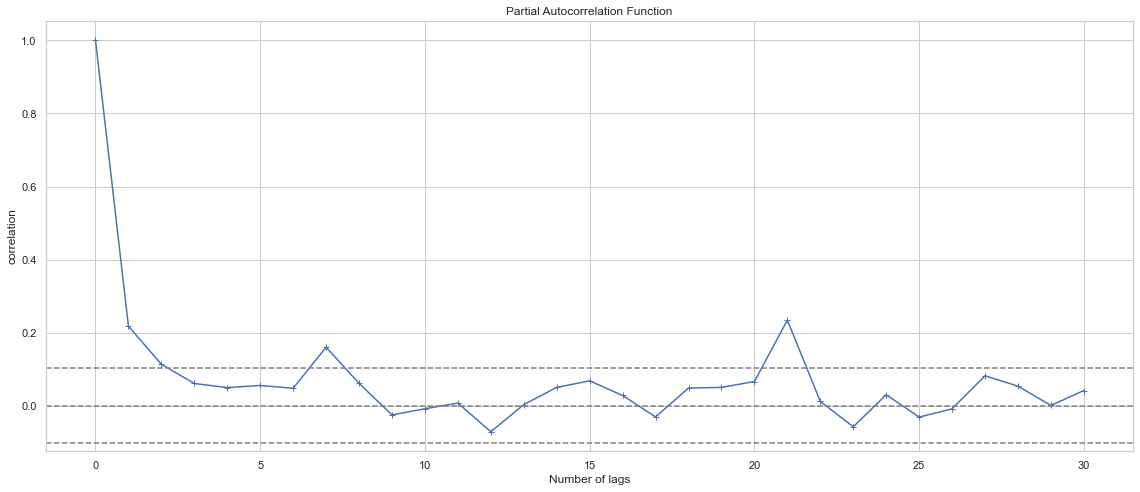

In [5]:
#calling partial correlation function
lag_pacf = pacf(data.values, nlags=30, method='ols')
#Plot PACF:
plt.figure(figsize=(16, 7))
plt.plot(lag_pacf,marker='+')
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(data.values)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(data.values)),linestyle='--',color='gray')
plt.title('Partial Autocorrelation Function')
plt.xlabel('Number of lags')
plt.ylabel('correlation')
plt.tight_layout()

In the above plot we can see that lags up to 2 have good correlation before the plot first cuts the upper confidence interval. This is our $p$ value, i.e. the order of our AR process. We can model given AR process using linear combination of first 2 lags.

To break this into the ARIMA order parameters, the ACF gives us a $p$ value $=2$ and the PACF gives us a $q$ value $=2$.